## Fase 2: Análise Exploratória de Dados

Nesta fase, realizaremos uma análise exploratória detalhada dos dados para entender melhor as relações entre as variáveis e identificar padrões importantes.

### 1. Importação das Bibliotecas e Carregamento dos Dados

Vamos importar as bibliotecas necessárias e carregar o dataset que utilizamos na Fase 1.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

In [2]:
# Carregando o dataset
df = pd.read_csv('../crop_yield.csv')
print(f"Dataset carregado com sucesso! Formato: {df.shape}")
df.head()

Dataset carregado com sucesso! Formato: (156, 6)


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### 2. Análise da Distribuição das Variáveis

Vamos analisar a distribuição de cada variável para entender melhor os dados.

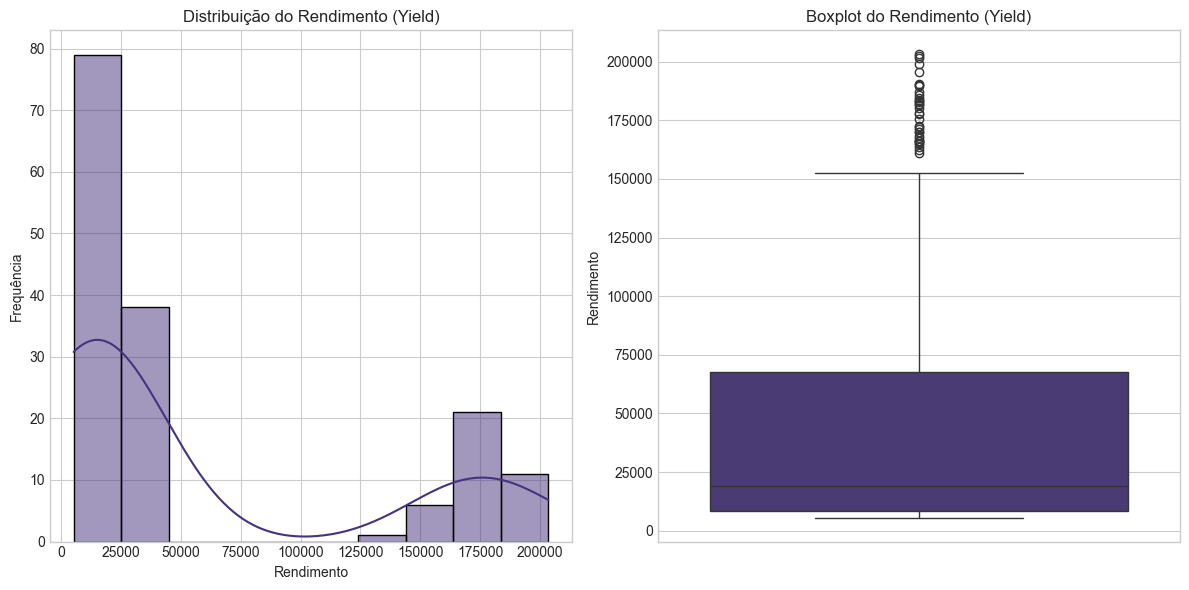

In [3]:
# Análise da distribuição da variável alvo (Yield)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Yield'], kde=True)
plt.title('Distribuição do Rendimento (Yield)')
plt.xlabel('Rendimento')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Yield'])
plt.title('Boxplot do Rendimento (Yield)')
plt.ylabel('Rendimento')

plt.tight_layout()
plt.show()

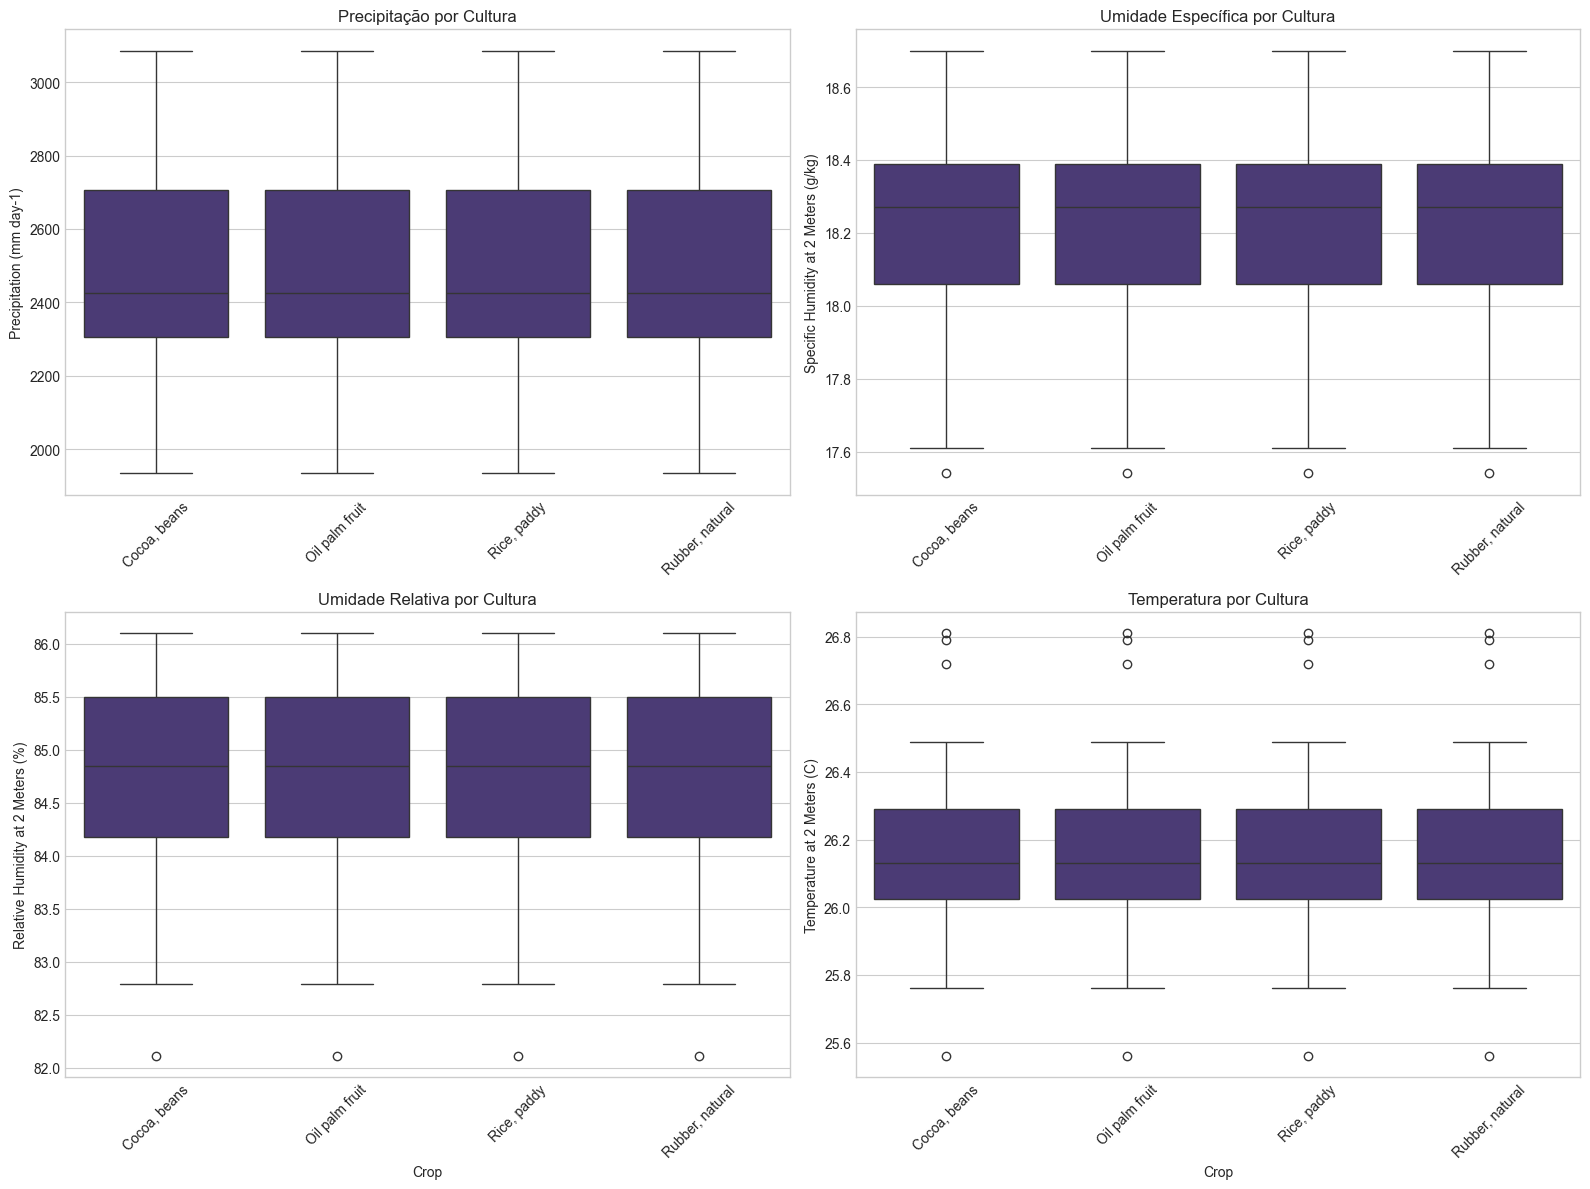

In [4]:
# Análise da distribuição das variáveis numéricas por cultura
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(x='Crop', y='Precipitation (mm day-1)', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Precipitação por Cultura')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Crop', y='Specific Humidity at 2 Meters (g/kg)', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Umidade Específica por Cultura')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Crop', y='Relative Humidity at 2 Meters (%)', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Umidade Relativa por Cultura')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Crop', y='Temperature at 2 Meters (C)', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Temperatura por Cultura')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

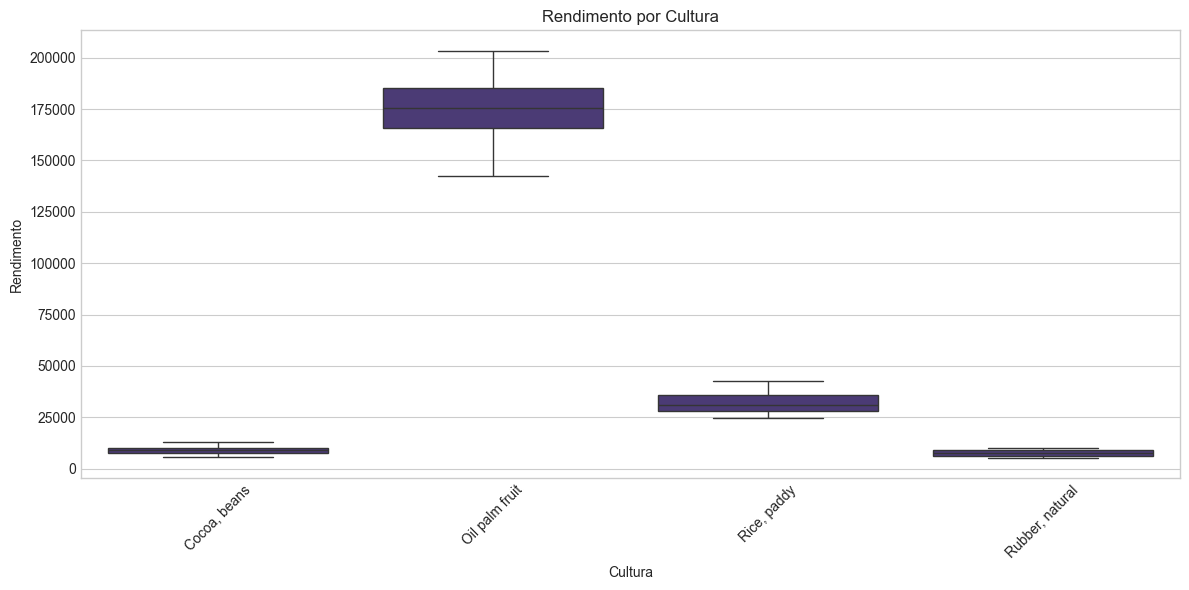

In [5]:
# Análise da distribuição do rendimento por cultura
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Yield', data=df)
plt.title('Rendimento por Cultura')
plt.xlabel('Cultura')
plt.ylabel('Rendimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Análise de Correlação

Vamos analisar as correlações entre as variáveis para identificar relações importantes.

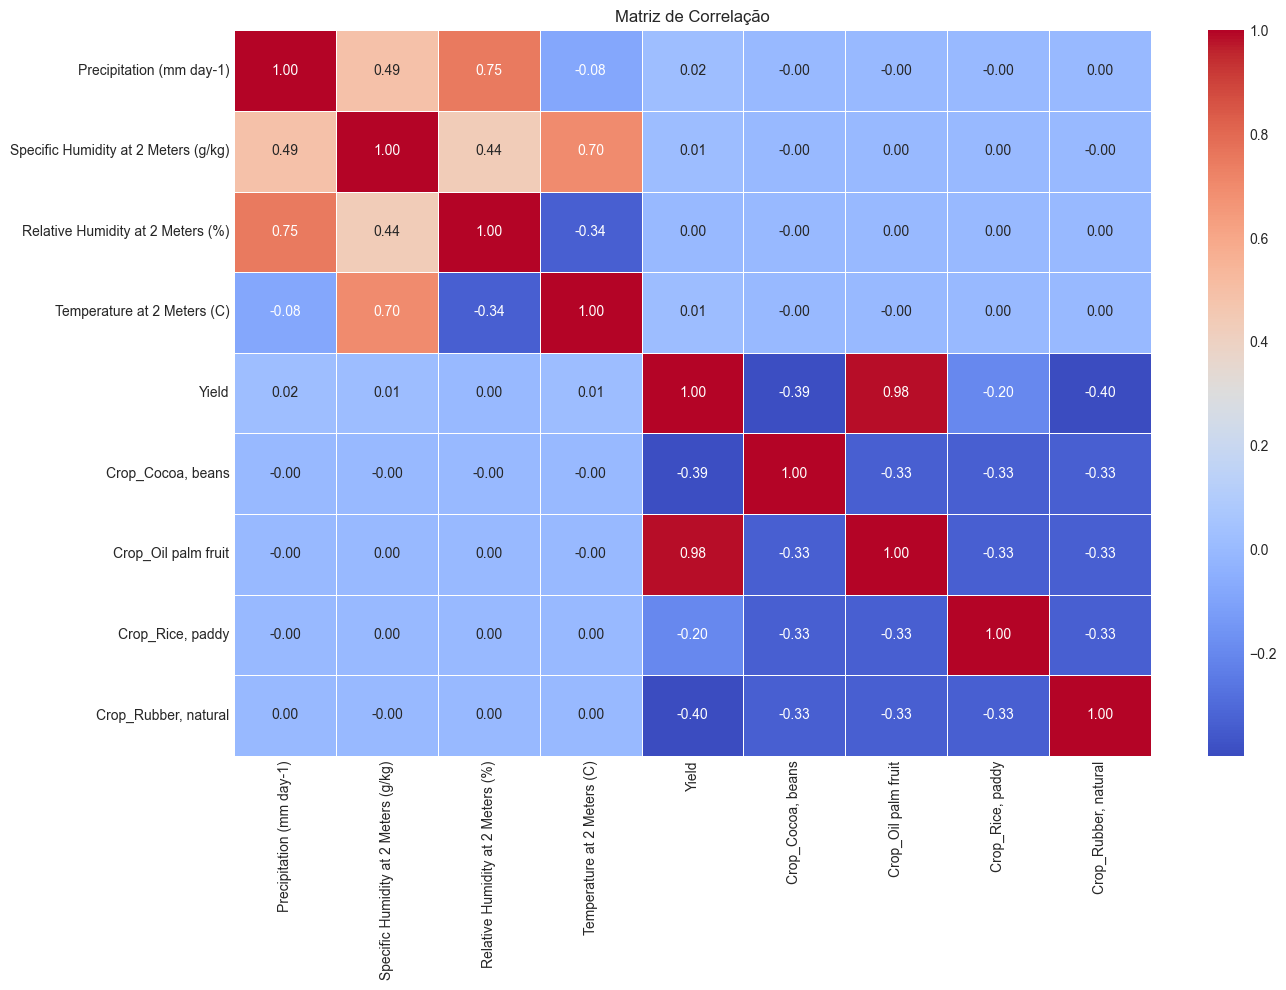

In [6]:
# Convertendo a coluna 'Crop' para numérica usando one-hot encoding para análise de correlação
df_encoded = pd.get_dummies(df, columns=['Crop'], drop_first=False)

# Calculando a matriz de correlação
correlation_matrix = df_encoded.corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

In [7]:
# Analisando as correlações com a variável alvo (Yield)
yield_correlations = correlation_matrix['Yield'].sort_values(ascending=False)
print("Correlações com o Rendimento (Yield):")
print(yield_correlations)

Correlações com o Rendimento (Yield):
Yield                                   1.000000
Crop_Oil palm fruit                     0.984116
Precipitation (mm day-1)                0.018830
Temperature at 2 Meters (C)             0.013007
Specific Humidity at 2 Meters (g/kg)    0.012651
Relative Humidity at 2 Meters (%)       0.000008
Crop_Rice, paddy                       -0.197836
Crop_Cocoa, beans                      -0.388788
Crop_Rubber, natural                   -0.397492
Name: Yield, dtype: float64


### 4. Análise de Dispersão

Vamos criar gráficos de dispersão para visualizar as relações entre as variáveis climáticas e o rendimento.

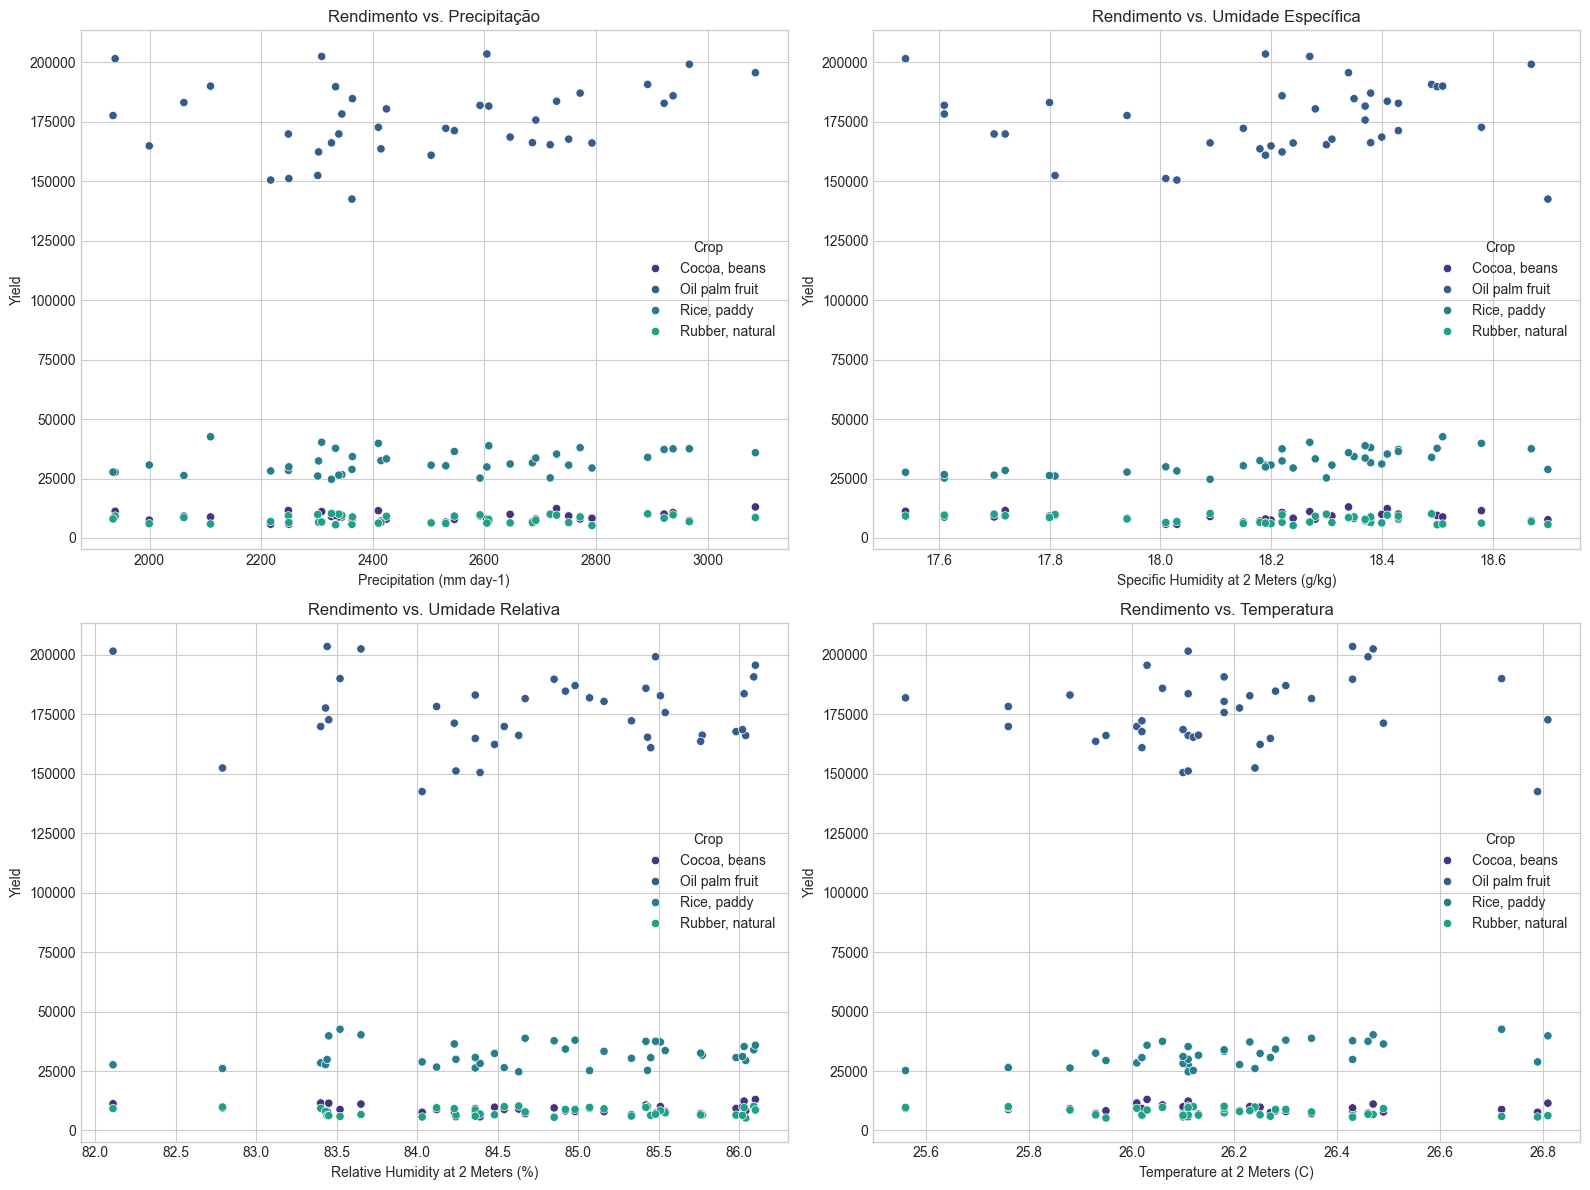

In [8]:
# Gráficos de dispersão entre variáveis climáticas e rendimento
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x='Precipitation (mm day-1)', y='Yield', hue='Crop', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Rendimento vs. Precipitação')

sns.scatterplot(x='Specific Humidity at 2 Meters (g/kg)', y='Yield', hue='Crop', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Rendimento vs. Umidade Específica')

sns.scatterplot(x='Relative Humidity at 2 Meters (%)', y='Yield', hue='Crop', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Rendimento vs. Umidade Relativa')

sns.scatterplot(x='Temperature at 2 Meters (C)', y='Yield', hue='Crop', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Rendimento vs. Temperatura')

plt.tight_layout()
plt.show()

### 5. Análise Estatística por Cultura

Vamos analisar as estatísticas descritivas para cada cultura separadamente.

In [9]:
# Estatísticas descritivas por cultura
for crop in df['Crop'].unique():
    print(f"\nEstatísticas para {crop}:")
    print(df[df['Crop'] == crop].describe())


Estatísticas para Cocoa, beans:
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                 39.000000                             39.000000   
mean                2486.498974                             18.203077   
std                  292.300450                              0.296809   
min                 1934.620000                             17.540000   
25%                 2305.750000                             18.060000   
50%                 2424.550000                             18.270000   
75%                 2705.210000                             18.390000   
max                 3085.790000                             18.700000   

       Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  \
count                          39.000000                    39.000000   
mean                           84.737692                    26.183590   
std                             1.006009                     0.263613   
min              

### 6. Análise de Outliers

Vamos identificar possíveis outliers nos dados que podem afetar a modelagem.

In [10]:
# Função para detectar outliers usando o método IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectando outliers para cada variável numérica
numeric_columns = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
                   'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

for column in numeric_columns:
    outliers = detect_outliers(df, column)
    print(f"\nOutliers em {column}: {len(outliers)} registros")
    if len(outliers) > 0:
        print(outliers[['Crop', column]])


Outliers em Precipitation (mm day-1): 0 registros

Outliers em Specific Humidity at 2 Meters (g/kg): 0 registros

Outliers em Relative Humidity at 2 Meters (%): 0 registros

Outliers em Temperature at 2 Meters (C): 12 registros
                Crop  Temperature at 2 Meters (C)
3       Cocoa, beans                        25.56
17      Cocoa, beans                        26.79
35      Cocoa, beans                        26.81
42    Oil palm fruit                        25.56
56    Oil palm fruit                        26.79
74    Oil palm fruit                        26.81
81       Rice, paddy                        25.56
95       Rice, paddy                        26.79
113      Rice, paddy                        26.81
120  Rubber, natural                        25.56
134  Rubber, natural                        26.79
152  Rubber, natural                        26.81

Outliers em Yield: 35 registros
              Crop   Yield
39  Oil palm fruit  169783
40  Oil palm fruit  201436
42  Oil

### 7. Análise de Pairplot

Vamos criar um pairplot para visualizar as relações entre todas as variáveis numéricas.

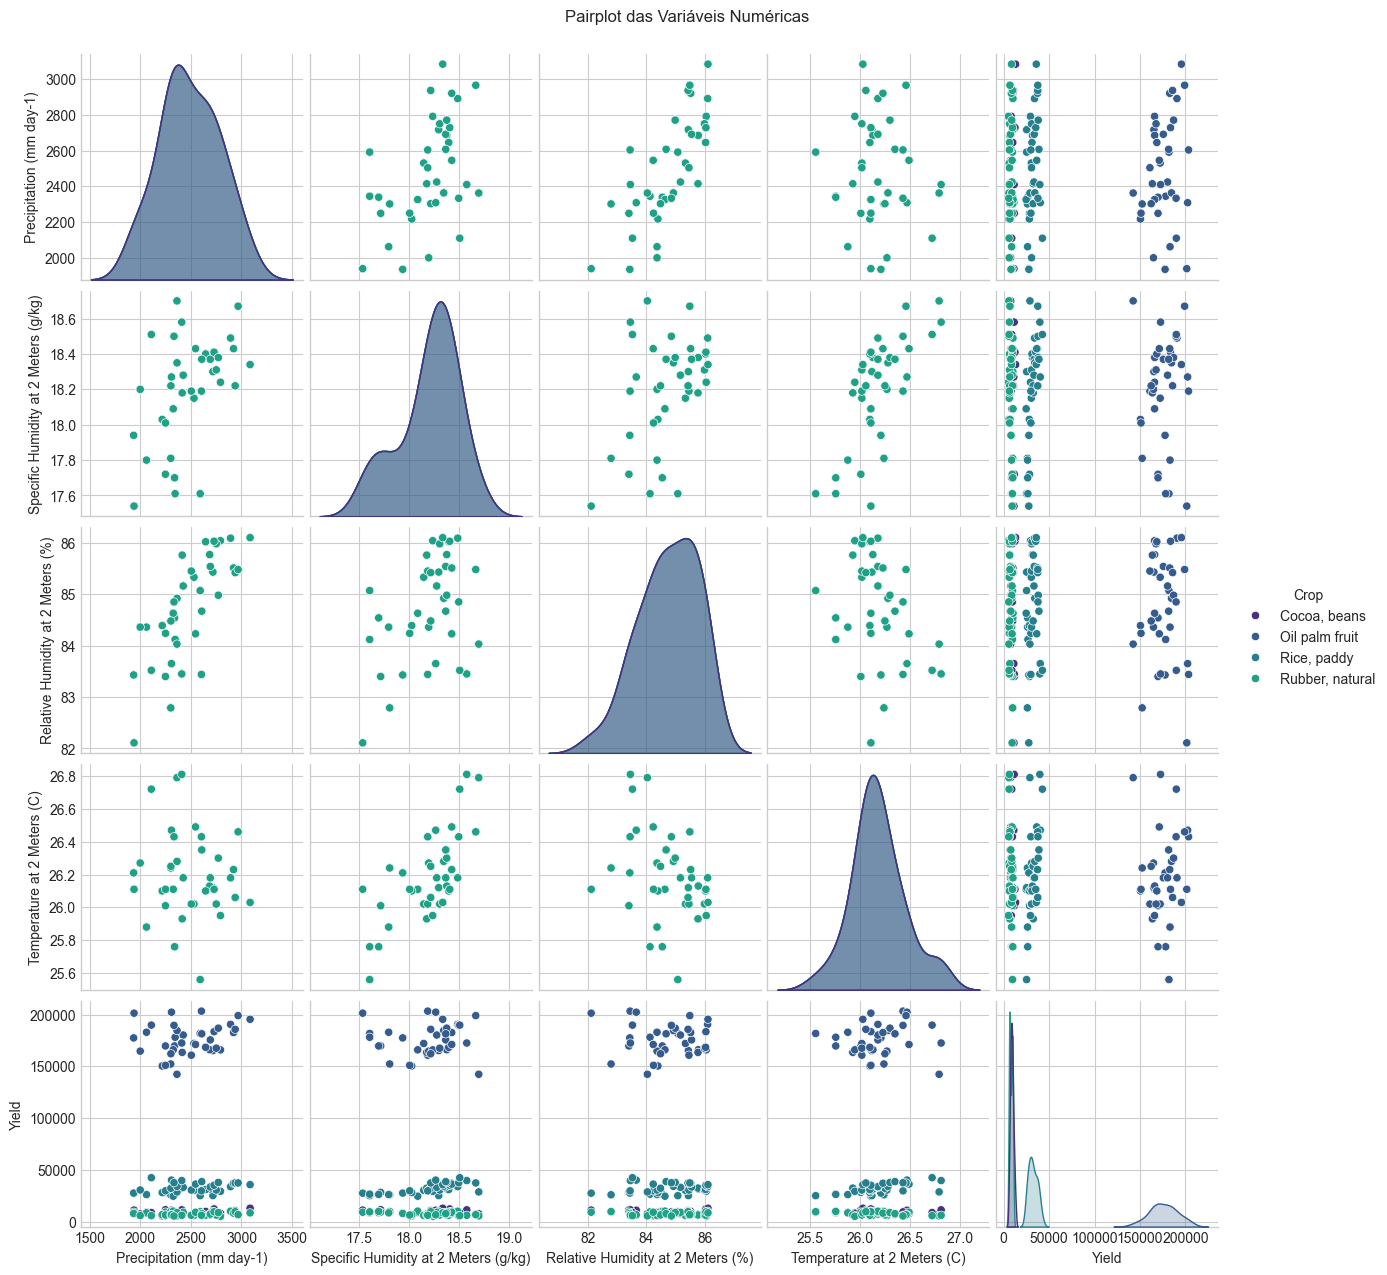

In [11]:
# Criando um pairplot para visualizar as relações entre todas as variáveis numéricas
sns.pairplot(df, hue='Crop', vars=numeric_columns[:-1] + ['Yield'])
plt.suptitle('Pairplot das Variáveis Numéricas', y=1.02)
plt.show()

### 8. Análise de Tendências

Vamos analisar as tendências entre as variáveis climáticas e o rendimento para cada cultura.

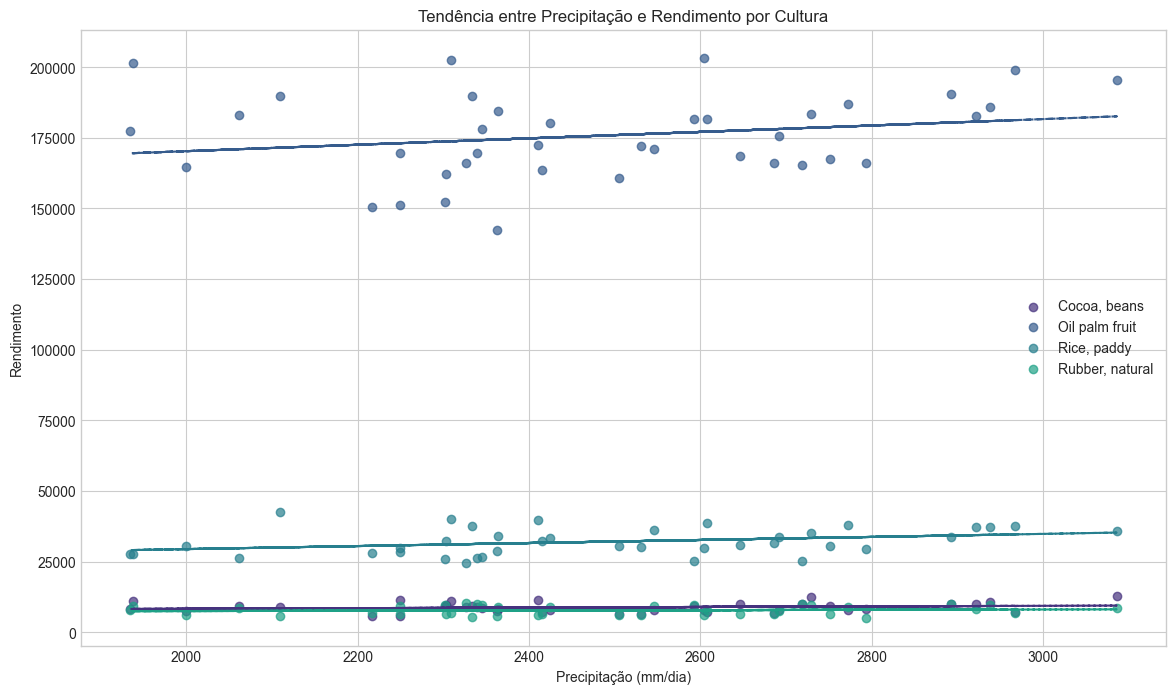

In [12]:
# Analisando tendências entre precipitação e rendimento para cada cultura
plt.figure(figsize=(14, 8))
for crop in df['Crop'].unique():
    crop_data = df[df['Crop'] == crop]
    plt.scatter(crop_data['Precipitation (mm day-1)'], crop_data['Yield'], label=crop, alpha=0.7)
    
    # Adicionando linha de tendência
    z = np.polyfit(crop_data['Precipitation (mm day-1)'], crop_data['Yield'], 1)
    p = np.poly1d(z)
    plt.plot(crop_data['Precipitation (mm day-1)'], p(crop_data['Precipitation (mm day-1)']), linestyle='--')

plt.title('Tendência entre Precipitação e Rendimento por Cultura')
plt.xlabel('Precipitação (mm/dia)')
plt.ylabel('Rendimento')
plt.legend()
plt.grid(True)
plt.show()

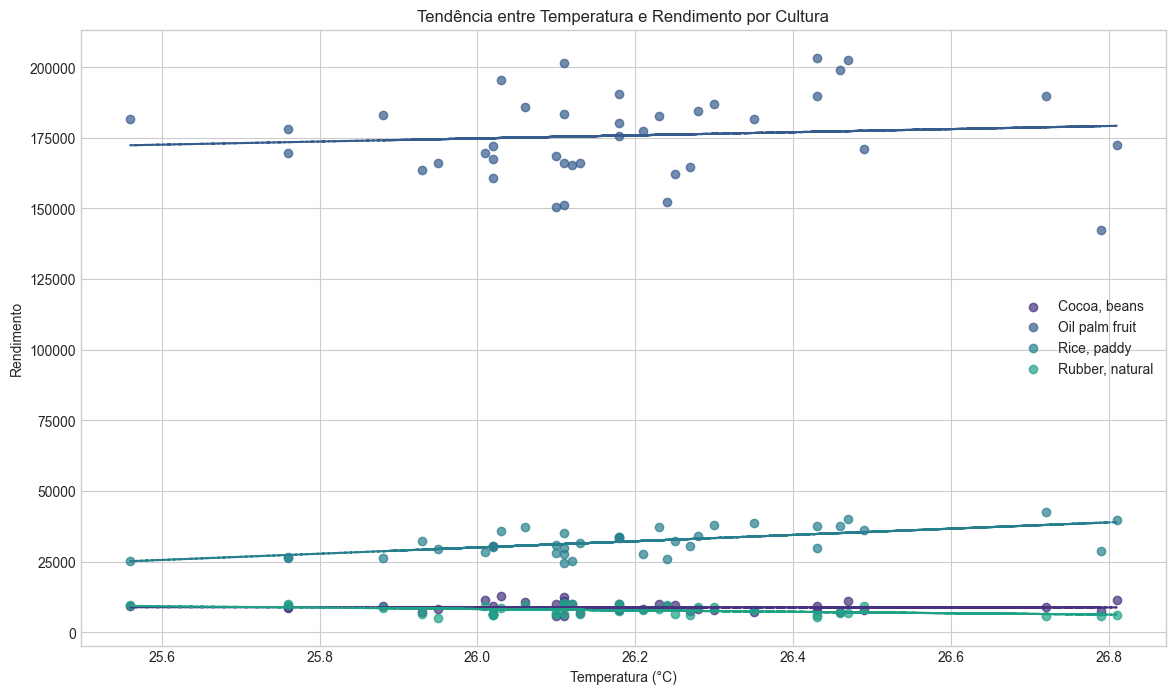

In [13]:
# Analisando tendências entre temperatura e rendimento para cada cultura
plt.figure(figsize=(14, 8))
for crop in df['Crop'].unique():
    crop_data = df[df['Crop'] == crop]
    plt.scatter(crop_data['Temperature at 2 Meters (C)'], crop_data['Yield'], label=crop, alpha=0.7)
    
    # Adicionando linha de tendência
    z = np.polyfit(crop_data['Temperature at 2 Meters (C)'], crop_data['Yield'], 1)
    p = np.poly1d(z)
    plt.plot(crop_data['Temperature at 2 Meters (C)'], p(crop_data['Temperature at 2 Meters (C)']), linestyle='--')

plt.title('Tendência entre Temperatura e Rendimento por Cultura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Rendimento')
plt.legend()
plt.grid(True)
plt.show()

## Conclusão da Fase 2

Nesta fase de análise exploratória, realizamos as seguintes tarefas:

1. Analisamos a distribuição das variáveis numéricas e do rendimento
2. Examinamos as correlações entre as variáveis
3. Criamos gráficos de dispersão para visualizar relações entre variáveis
4. Analisamos estatísticas descritivas por cultura
5. Identificamos possíveis outliers nos dados
6. Criamos um pairplot para visualizar todas as relações entre variáveis
7. Analisamos tendências entre variáveis climáticas e rendimento

Principais insights obtidos:
- Cada cultura tem um padrão distinto de rendimento, com Oil palm fruit apresentando os maiores valores médios
- Existe uma correlação positiva entre precipitação e rendimento para culturas como Cocoa beans e Oil palm fruit
- A temperatura tem um impacto diferente em cada cultura, sendo que algumas apresentam melhor rendimento em temperaturas mais baixas (como Rubber natural) e outras em temperaturas mais altas
- A umidade relativa parece ser um fator importante para o rendimento de todas as culturas analisadas
- Identificamos alguns outliers no rendimento que podem representar safras excepcionais ou erros de medição

Na próxima fase (Fase 3), realizaremos a preparação dos dados para modelagem, incluindo normalização, codificação de variáveis categóricas e divisão em conjuntos de treino e teste.